# 线性回归

0.5482812185435971
0.43606903238180605
0.5356597030142565
0.736263899848181


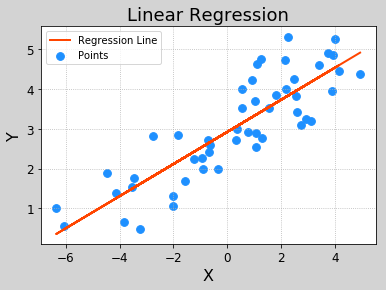

In [2]:
"""
线性回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x ,y = np.loadtxt('../ml_data/single.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
# 训练模型
model = lm.LinearRegression()
model.fit(x, y)
pred_y = model.predict(x)

# 评估回归模型的误差
# 平均绝对值误差  1/m∑|预测输出-真实输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差  sqrt(1/m∑(预测输出-真实输出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位数绝对值误差  median(|预测输出-真实输出|)
print(sm.median_absolute_error(y, pred_y))
# r2得分 (0,1]的一个分值,分数越高,误差越小
print(sm.r2_score(y, pred_y))

mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')
mp.plot(x, pred_y, c='orangered', linewidth=2,
	label='Regression Line')
mp.legend()
mp.show()